In [61]:
from dasquakes import *
import datetime
import numpy as np
import matplotlib.pyplot as plt

# 1. Choose the following parameters to select data to examine

In [68]:
cable='seadasn'
record_length = 5 #minutes
t0 = datetime.datetime(2022, 11, 30, 19, 21, 0)

# 2. Run the functions to return the data

In [69]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

# 3. Use $attrs$ to see the aquisition parameters

In [70]:
nt = data.shape[0]
nx = data.shape[1]
print(f'Number of time steps: {nt}, Number of channels: {nx}')

print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

Number of time steps: 30000, Number of channels: 2088
Nyquist Frequency: 50.0 Hz, cable length: 9992.571672632936 m


In [71]:
attrs

{'AcquisitionId': b'/',
 'BandDataMaxUserValue': 0.0,
 'BandDataMinUserValue': 0.0,
 'Build': b'5.18.18_P',
 'CommitHash': b'4d27a7aa',
 'DasInstrumentBox': b'ONYX',
 'DetectionAccuracy': b'Not Applicable',
 'FFID': 0,
 'FiberID': 1,
 'GaugeLength': 9.571428805203961,
 'GaugeLengthUnit': b'm',
 'Hostname': b'ONYX-0203',
 'MaximumFrequency': 50.0,
 'MeasurementStartTime': b'2022-11-30T19:21:00.001500+00:00',
 'MinimumFrequency': 0.0,
 'NumberOfLoci': 2089,
 'OpticalPath': b'OpticalPath',
 'PulseRate': 100.0,
 'PulseRateUnit': b'Hz',
 'PulseWidth': 20.0,
 'PulseWidthUnit': b'ns',
 'SoftwareVersion': b'3176',
 'SpatialSamplingInterval': 4.785714402601981,
 'SpatialSamplingIntervalUnit': b'm',
 'StartLocusIndex': 0,
 'SystemType': b'Xavier',
 'TriggeredMeasurement': 0,
 'schemaVersion': b'2.0',
 'uuid': b'b7d784eb-a873-4182-ba5e-4c1a6798c7d8'}

# 4. Make a simple plot of the data

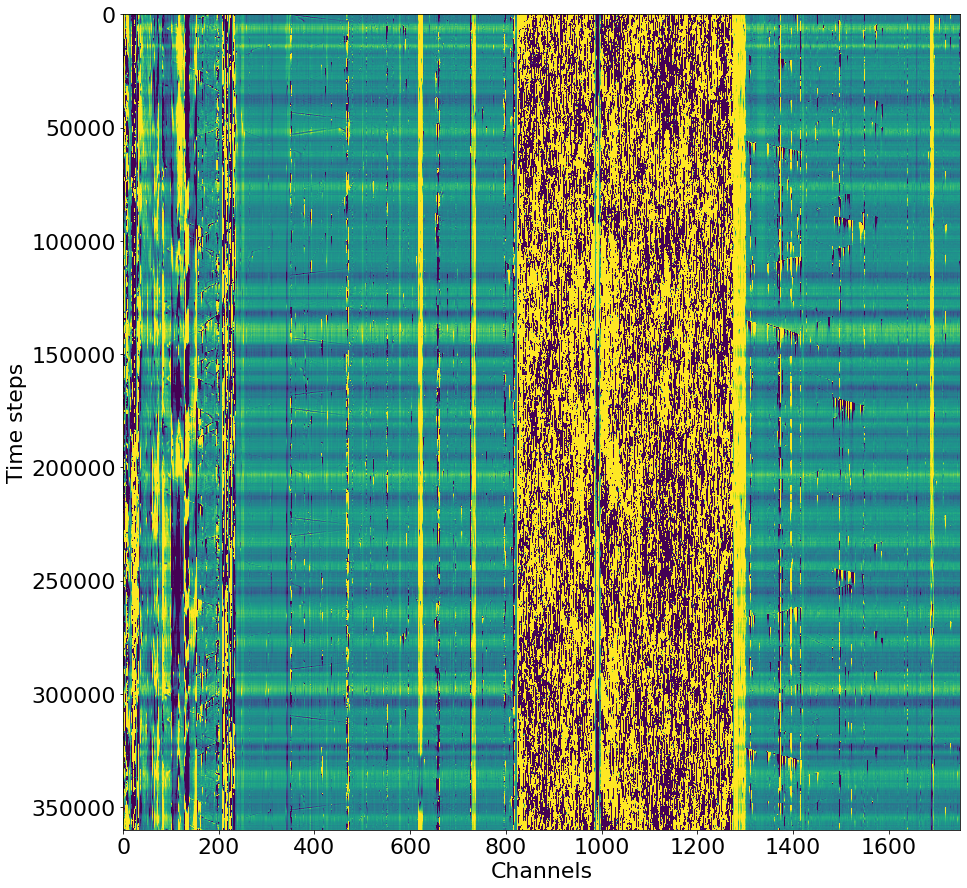

In [88]:
plt.rcParams.update({'font.size': 22})
plt.subplots(figsize=(15,15))
plt.imshow(data,aspect='auto',vmin=-1,vmax=1)#, extent=[0,attrs['SpatialSamplingInterval']*nx,0,nt/attrs['PulseRate']])
plt.xlabel('Channels')
plt.ylabel('Time steps')
plt.show()

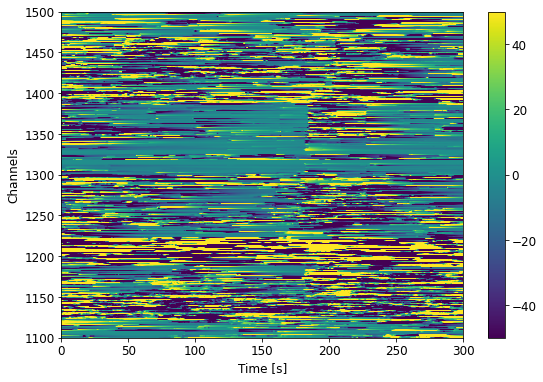

In [111]:
min_chan = 1100
max_chan = 1500
n_data = data[:,min_chan:max_chan] # first time than channels
plt.subplots(figsize=(9,6))
plt.imshow(n_data.transpose(),aspect='auto',vmin=-50,vmax=50, origin='lower',
            extent=[0,nt/attrs['PulseRate'],min_chan,max_chan]
          )
plt.xlabel('Time [s]')
plt.ylabel('Channels')
plt.colorbar()

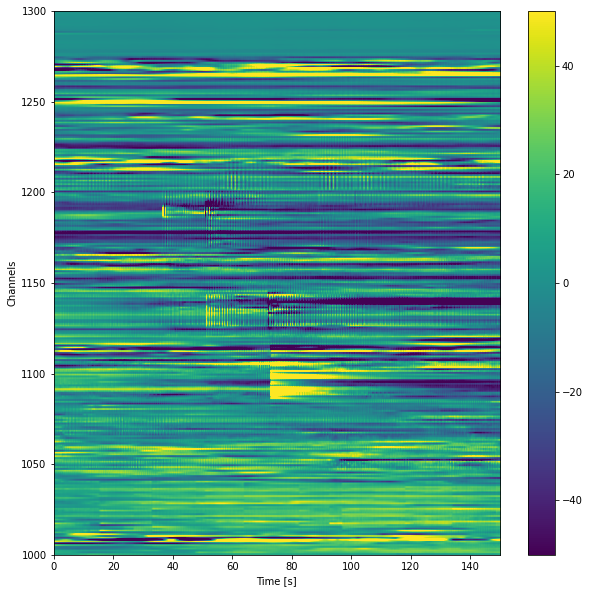

In [27]:
min_chan = 1000
max_chan = 1300
n_data = data[700*100:850*100,min_chan:max_chan] # first time than channels
plt.subplots(figsize=(10,10))
plt.imshow(n_data.transpose(),aspect='auto',vmin=-50,vmax=50, origin='lower',
            extent=[0,n_data.shape[0]/attrs['PulseRate'],min_chan,max_chan]
          )
plt.xlabel('Time [s]')
plt.ylabel('Channels')
plt.colorbar()

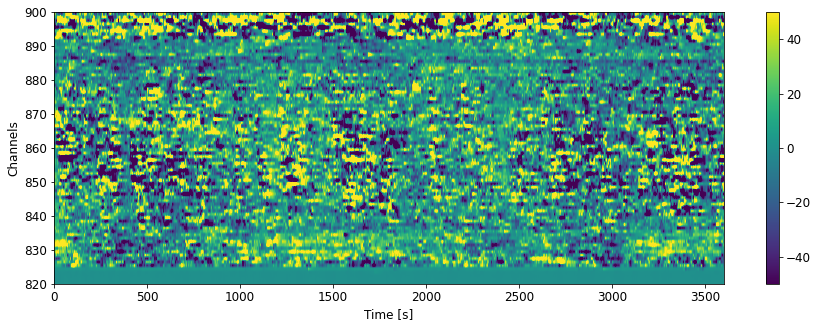

In [62]:
min_chan = 820
max_chan = 900
n_data = data[:,min_chan:max_chan] # first time than channels
plt.subplots(figsize=(15,5))
plt.imshow(n_data.transpose(),aspect='auto',vmin=-50,vmax=50, origin='lower',
            extent=[0,nt/attrs['PulseRate'],min_chan,max_chan]
          )
plt.xlabel('Time [s]')
plt.ylabel('Channels')
plt.colorbar()

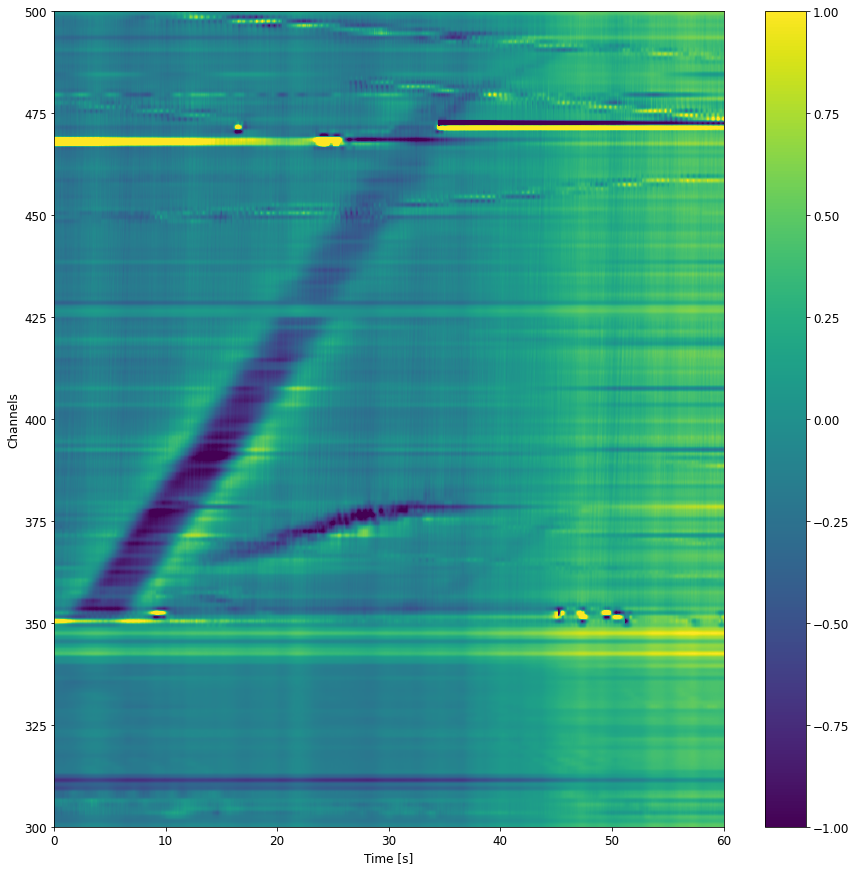

In [98]:
min_chan = 300
max_chan = 500
n_data = data[:6000,min_chan:max_chan] # first time than channels
plt.subplots(figsize=(15,15))
plt.imshow(n_data.transpose(),aspect='auto',vmin=-1,vmax=1, origin='lower',
            extent=[0,n_data.shape[0]/attrs['PulseRate'],min_chan,max_chan]
          )
plt.xlabel('Time [s]')
plt.ylabel('Channels')
plt.colorbar()

## Play with filter

In [73]:
from scipy.signal import sosfiltfilt, butter, filtfilt, detrend
from scipy.fftpack import fft, ifft, fftfreq, next_fast_len

In [74]:
plt.rcParams["figure.figsize"] = (10,8) # set default figure size
plt.rcParams.update({'font.size': 12}) # set default font size

In [83]:
# parameter settings and definition
min_chan = 1100
max_chan = 1200
min_t = 720*100
max_t = 820*100
channels = range(min_chan, max_chan, 5)

fs = attrs['PulseRate'] # sampling rate

In [85]:
np.arange(0,len(data[min_t:max_t,channel])/fs,1/fs)

array([], dtype=float64)

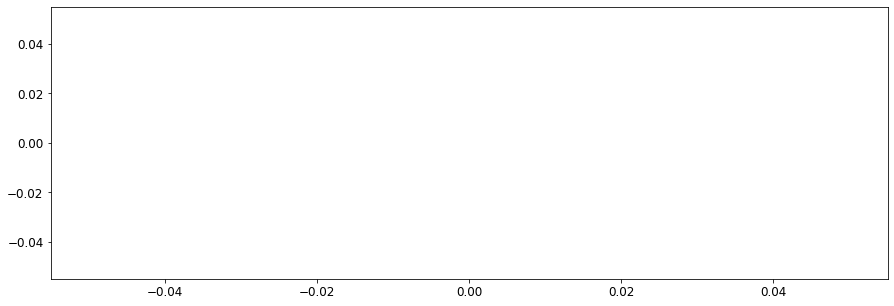

In [84]:
# plot raw channel data
plt.subplots(figsize=(15,5))
for channel in channels:
    plt.plot(np.arange(0,len(data[min_t:max_t,channel])/fs,1/fs), data[min_t:max_t,channel], alpha=0.5, label='channel {}'.format(channel))
    #plt.legend(loc='upper right', ncol=3)

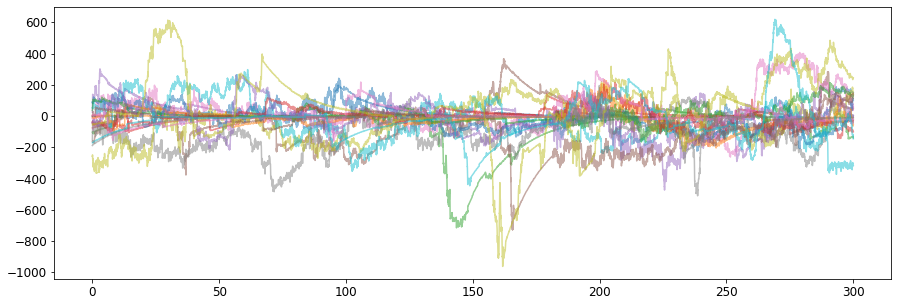

In [87]:
# plot raw channel data
plt.subplots(figsize=(15,5))
for channel in channels:
    plt.plot(np.arange(0,len(data[:,channel])/fs,1/fs), data[:,channel], alpha=0.5, label='channel {}'.format(channel))
    #plt.legend(loc='upper right', ncol=3)

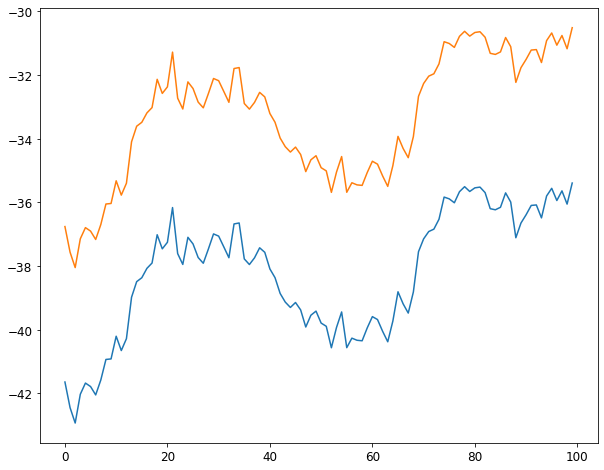

In [55]:
my_data_new = detrend(my_data, axis=0)
my_data_new
plt.plot(my_data[:100])
plt.plot(my_data_new[:100])

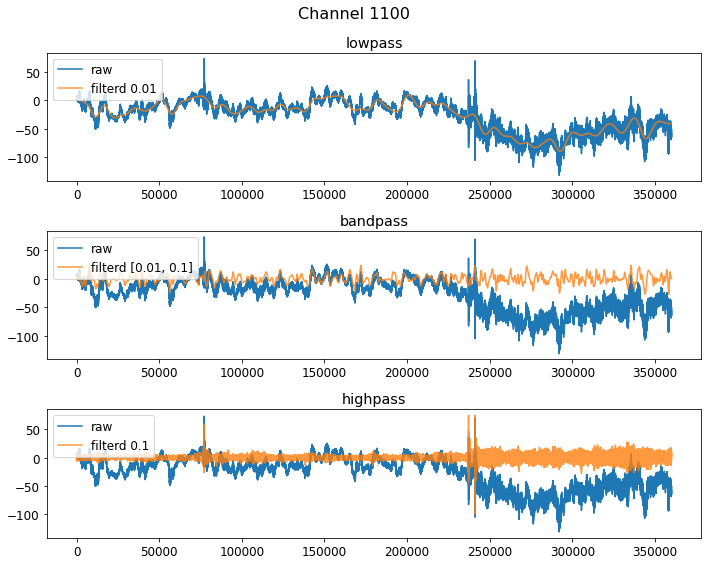

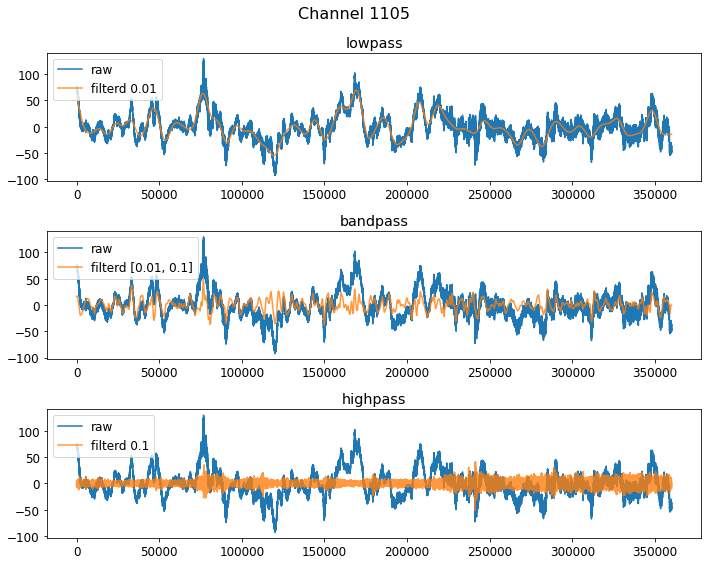

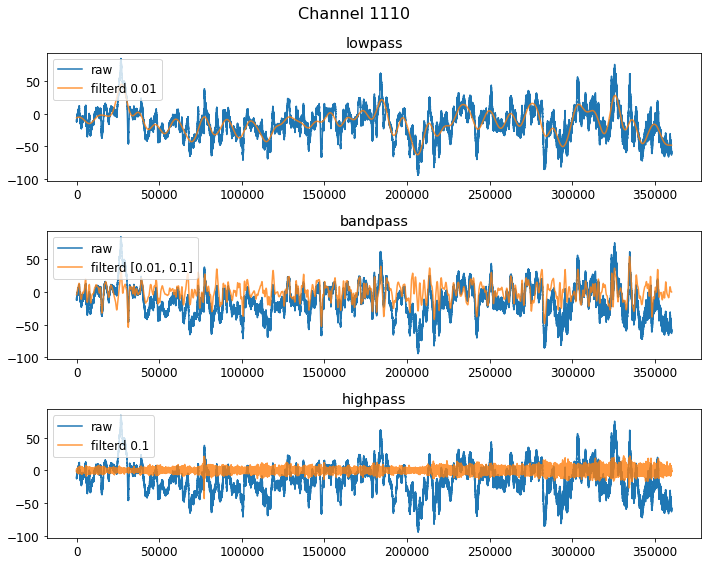

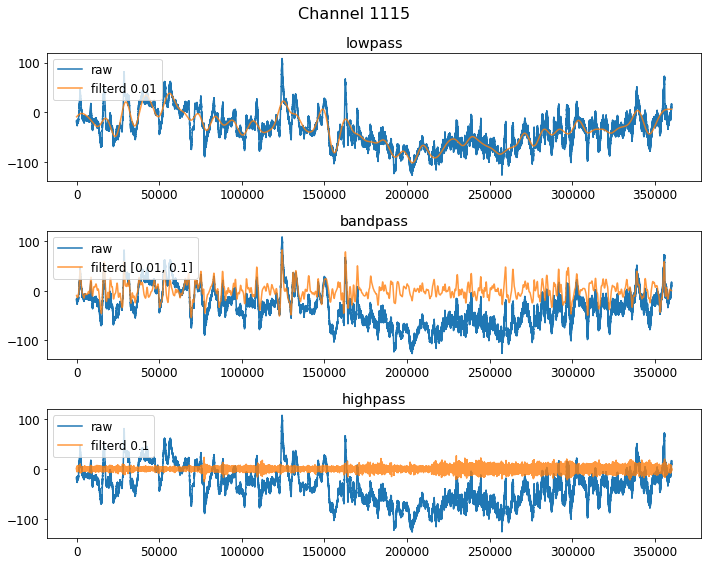

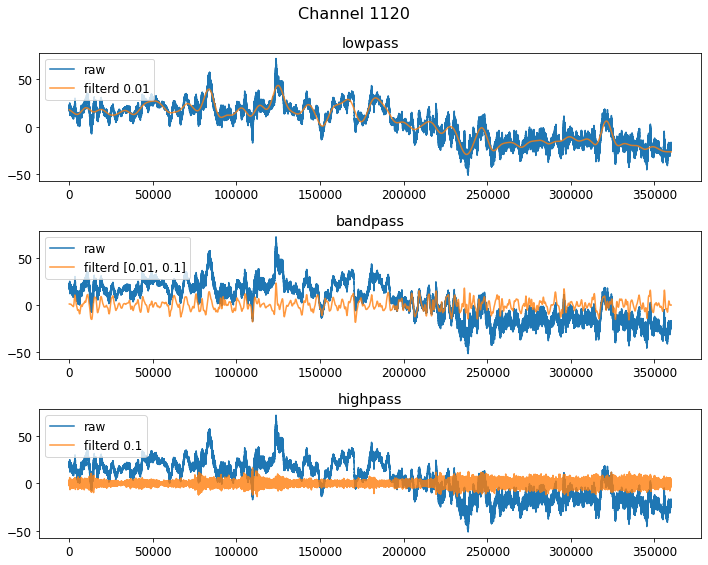

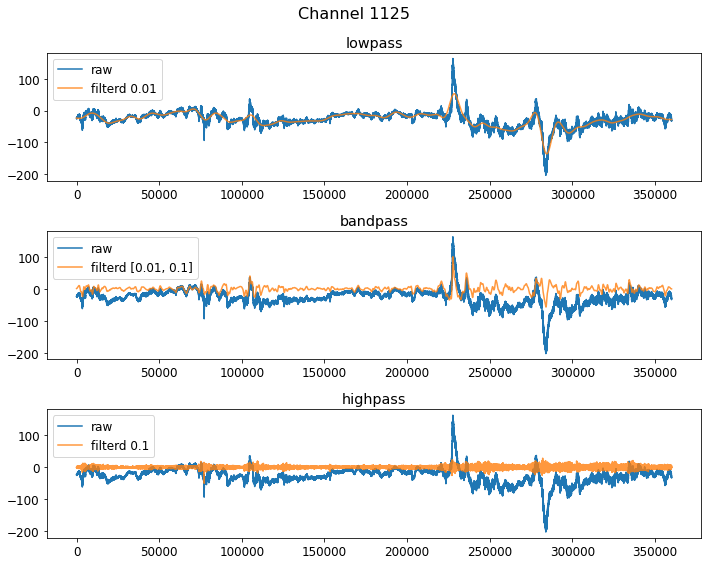

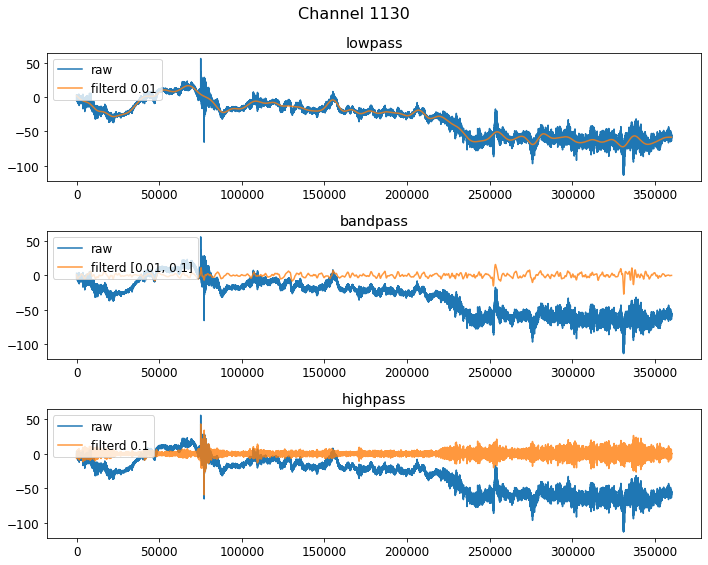

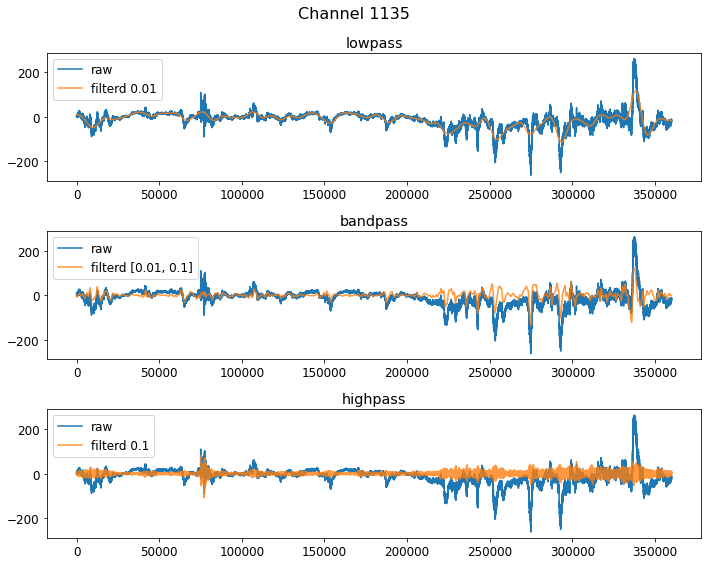

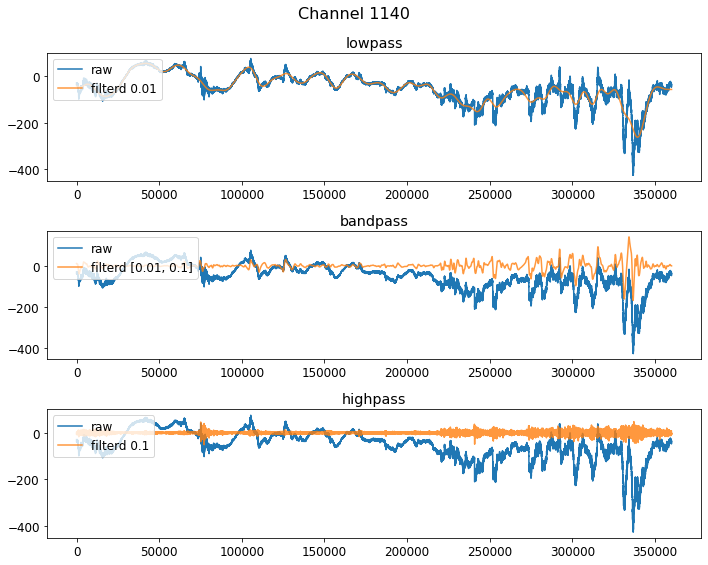

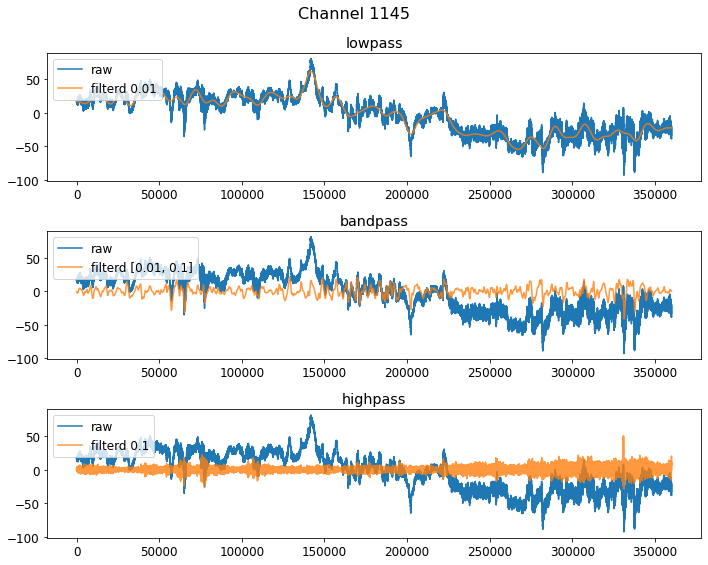

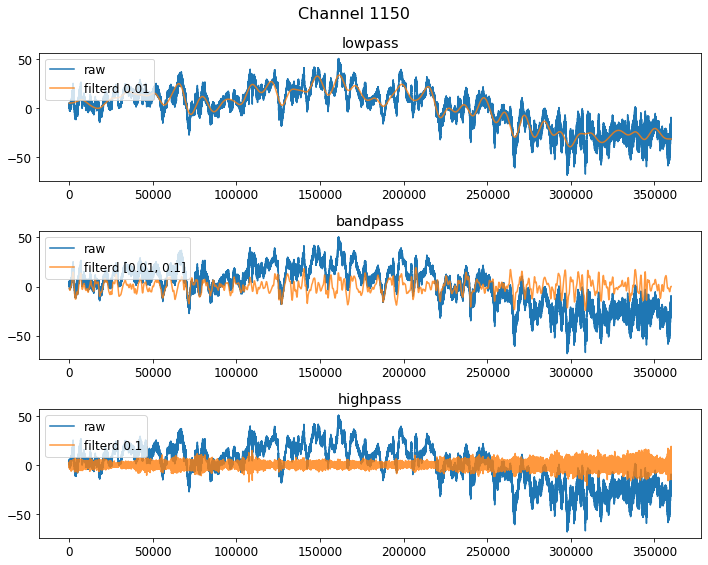

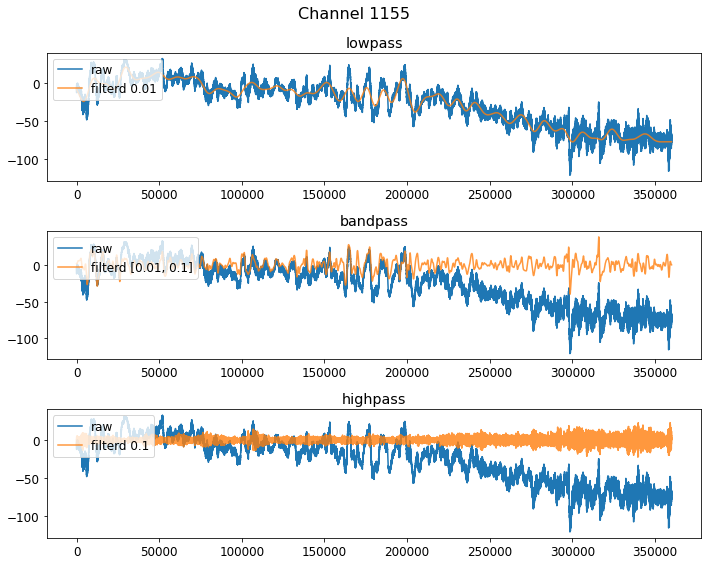

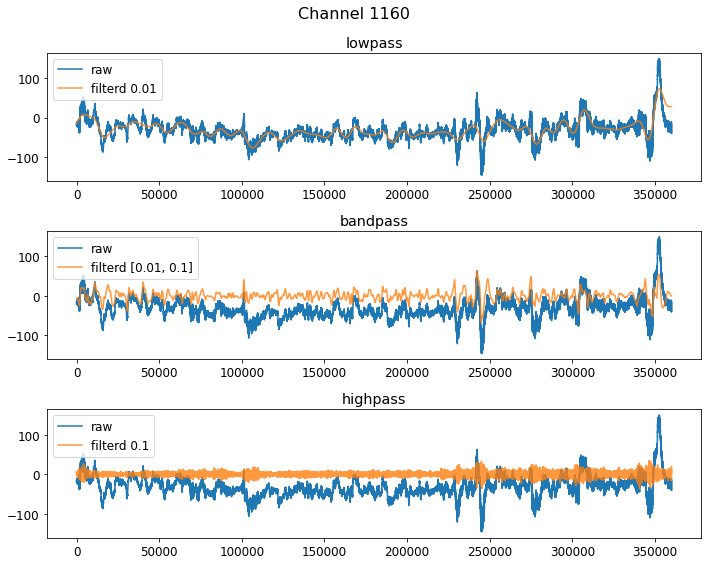

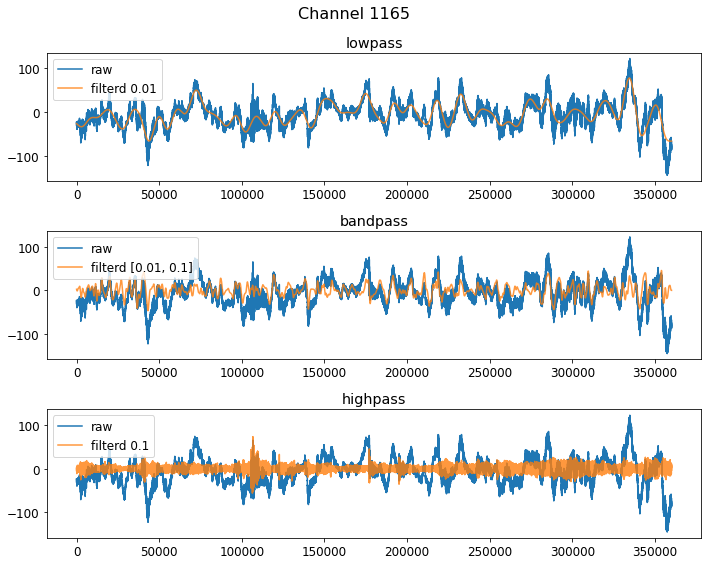

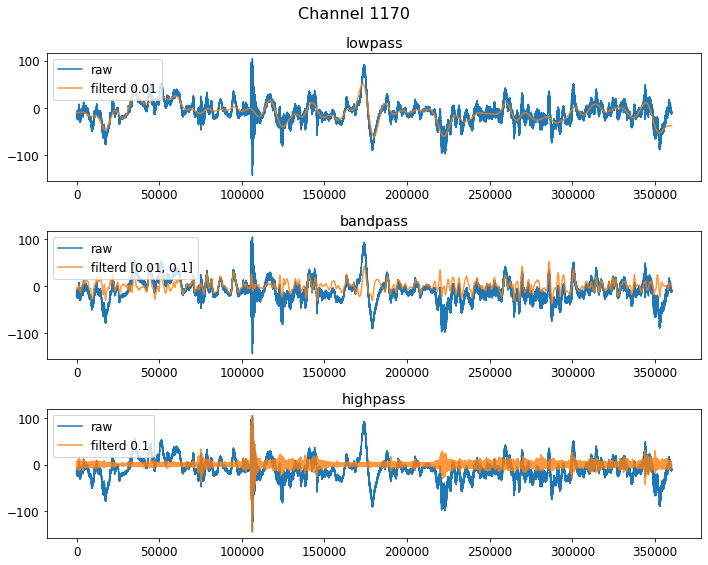

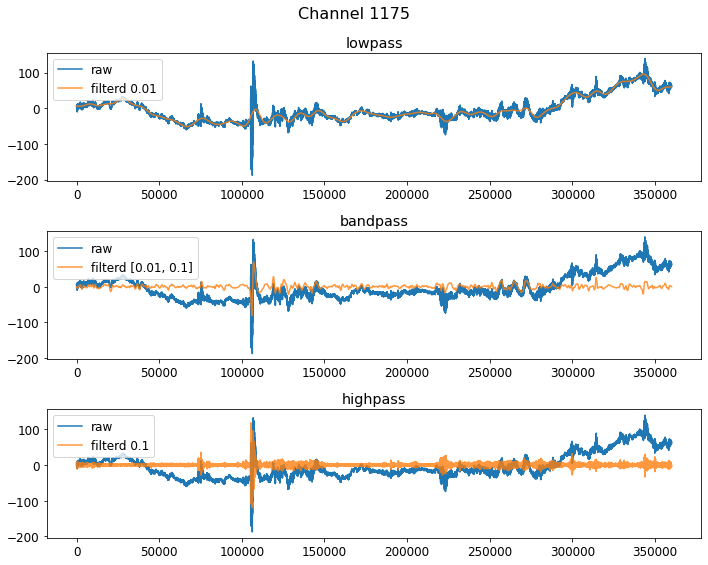

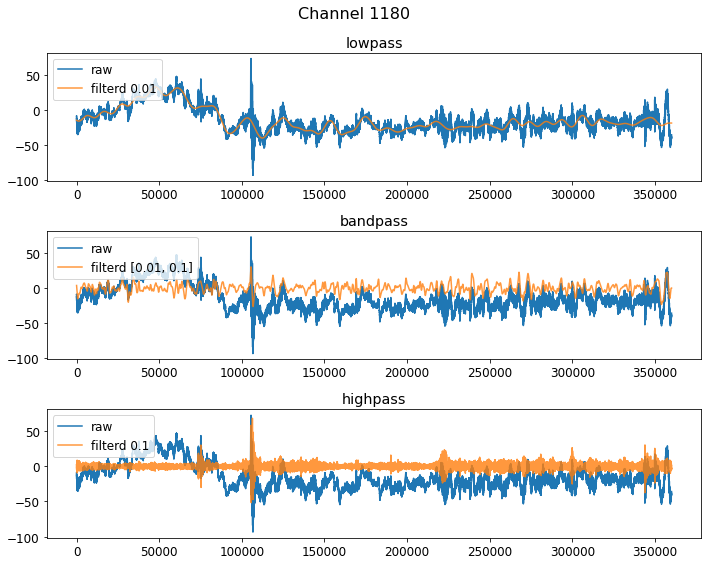

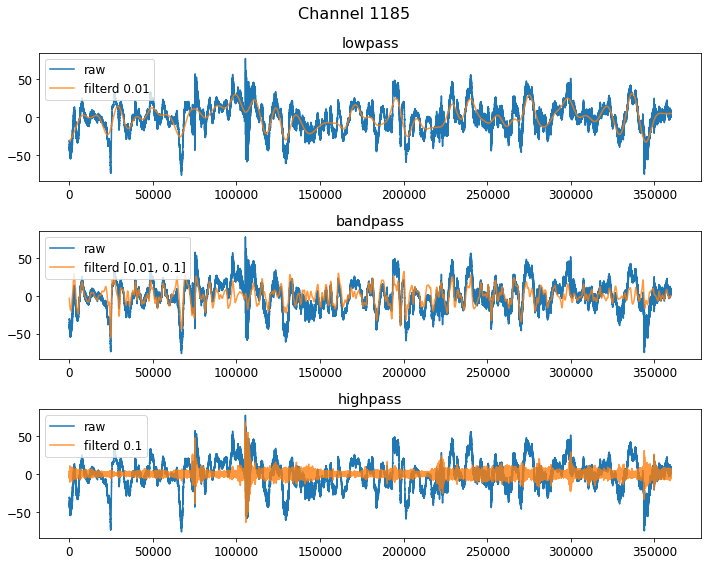

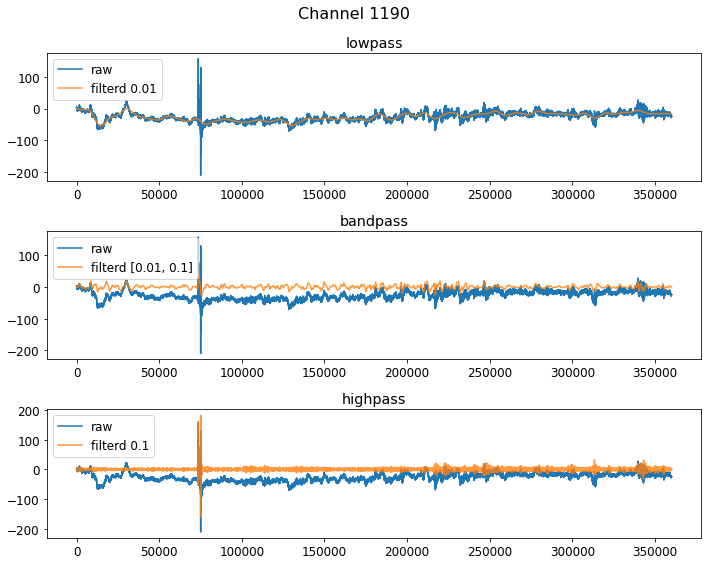

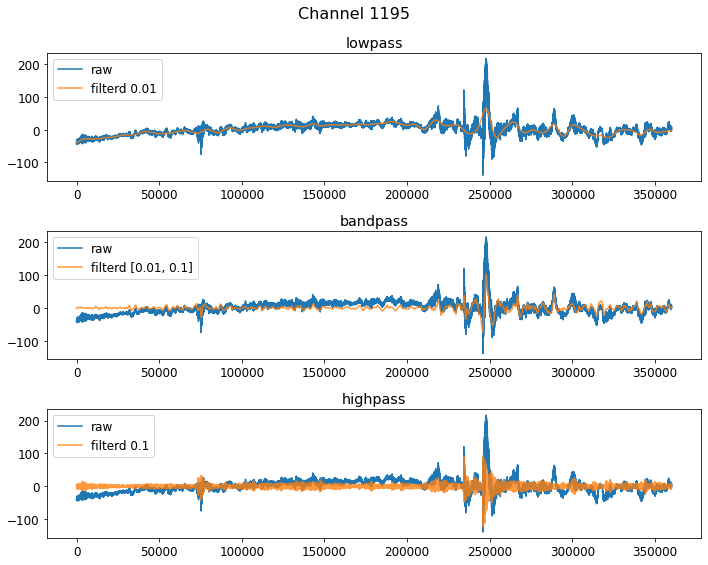

NameError: name 'fig1' is not defined

In [47]:
# apply lowpass bandpass and highpass filter
filter_type = ['lowpass','bandpass','highpass']
frequencies = [0.01, [0.01, 0.1], 0.1]
fft_l = []

for channel in channels:
    my_data = data[:,channel] # take data from one channel
    Nfft = next_fast_len(len(my_data)) # fill up until 2^N value to speed up the FFT
    freqVec = fftfreq(Nfft, d=1/fs)[:Nfft//2]
    
    fft_raw = fft(my_data,n=Nfft)
    fft_raw = np.abs(fft_raw[:Nfft//2])/Nfft
    fft_l.append(fft_raw)
    
    
    fig, ax = plt.subplots(len(filter_type)) # open figure
    filtered_l = [my_data] # create list with raw data
    
    for i in range(len(filter_type)):
        # filtering
        sos = butter(4, frequencies[i], filter_type[i], fs=fs, output='sos') # order=4
        filtered = sosfiltfilt(sos, my_data)
        filtered_l.append(filtered)

        # plotting
        ax[i].plot(my_data, label='raw')
        ax[i].plot(filtered, label='filterd {}'.format(frequencies[i]), alpha=0.8)
        ax[i].set_title(filter_type[i])
        ax[i].legend(loc='upper left')
        fig.suptitle('Channel {}'.format(channel), fontsize=16)
    plt.tight_layout()
    plt.show()

In [57]:
len(filtered_l)

4

In [60]:
len(filtered_l[0])

360000

In [ ]:
# spectrum raw data
fig,ax = plt.subplots()
#for i in range(len(fft_l)):
for i in range(5):
    ax.plot(freqVec,fft_l[i], label='Channel {}'.format(channels[i]), alpha=0.5)

ax.grid(True)
ax.legend(loc='upper right', ncol=3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (m/s)')

Text(0, 0.5, 'Amplitude (m/s)')

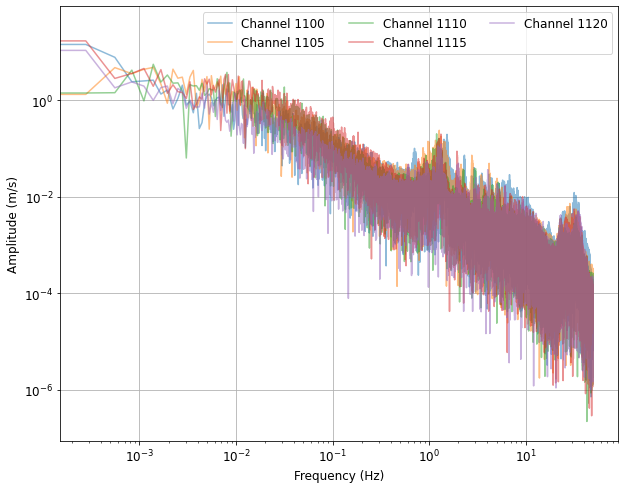

In [56]:
# spectrum raw data
fig,ax = plt.subplots()
#for i in range(len(fft_l)):
for i in range(5):
    ax.plot(freqVec,fft_l[i], label='Channel {}'.format(channels[i]), alpha=0.5)

ax.grid(True)
ax.legend(loc='upper right', ncol=3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (m/s)')

In [189]:
# apply lowpass bandpass and highpass filter
min_chan = 500
max_chan = 600

filtered_l = []

for channel in range(min_chan,max_chan):
    my_data = data[:,channel] # take data from one channel
    # filtering
    sos = butter(4, 0.5, 'highpass', fs=fs, output='sos') # order=4
    filtered = sosfiltfilt(sos, my_data)
    filtered_l.append(filtered)

In [190]:
filt_data = np.asarray(filtered_l)
filt_data.shape

(100, 30000)

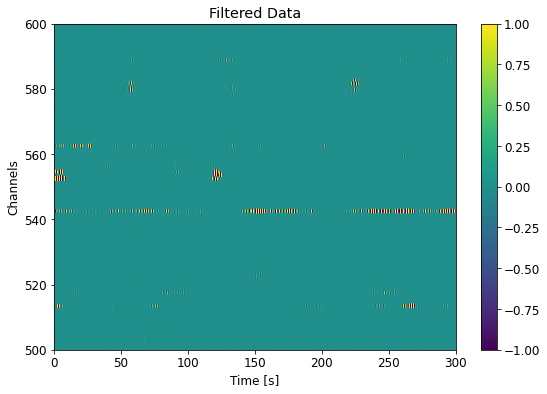

In [191]:
plt.subplots(figsize=(9,6))
plt.imshow(filt_data,aspect='auto',vmin=-1,vmax=1, origin='lower',
            extent=[0,nt/attrs['PulseRate'],min_chan,max_chan]
          )
plt.title('Filtered Data')
plt.xlabel('Time [s]')
plt.ylabel('Channels')
plt.colorbar()

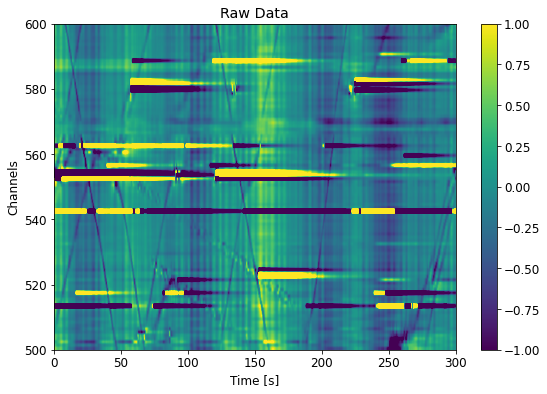

In [194]:
min_chan = 500
max_chan = 600
n_data = data[:,min_chan:max_chan] # first time than channels
plt.subplots(figsize=(9,6))
plt.imshow(n_data.transpose(),aspect='auto',vmin=-1,vmax=1, origin='lower',
            extent=[0,nt/attrs['PulseRate'],min_chan,max_chan]
          )
plt.title('Raw Data')
plt.xlabel('Time [s]')
plt.ylabel('Channels')
plt.colorbar()

### Plot a spectrogram

In [180]:
tr_data[0]

30000

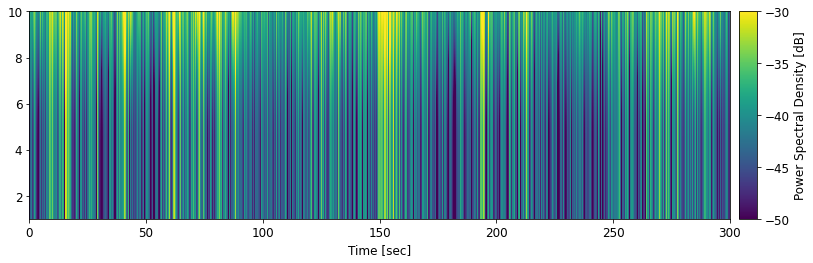

In [205]:
tr_data = n_data[:,10]

NFFT = fs * 0.1 # bin size for fourier transform. Type in length (seconds)

fig = plt.figure(figsize=(6.4*2,4.8)) #create figure and add axes to it
# ax1 = fig.add_axes([0.1, 0.1, 0.7, 0.60]) #[left bottom width height]
# ax2 = fig.add_axes([0.83, 0.1, 0.03, 0.6])
ax1 = fig.add_axes([0.125, 0.125, 0.76, 0.6])
ax2 = fig.add_axes([0.895, 0.125, 0.02, 0.6]) # colorbar

#plot spectrogram on first axis
Pxx, freqs, bins, im = ax1.specgram(tr_data, NFFT=int(NFFT), Fs=fs,
                                    noverlap=0,         # overlap of bins in samples
                                    detrend='linear',   # detrending before taking fourier transform
                                    mode='psd',         # 'psd', 'magnitude', 'angle', 'phase'
                                    scale_by_freq=True, # unit/Hz
                                    scale='dB',         #'linear', 'dB'
                                    cmap='viridis',     # your favourite colormap
                                    vmin=-50,
                                    vmax=-30,
                                   )


# # show hour of day on x-axis
# h_int = 6
# x_ticks = np.arange(0,24+h_int,h_int)
# x_tickloc = np.linspace(np.min(bins), np.max(bins), len(x_ticks))
# ax1.set_xticks(x_tickloc)
# ax1.set_xticklabels(['{}/{}  {:02d}:00'.format(tr.stats.starttime.month,tr.stats.starttime.day,
#                                                x) for x in x_ticks])
# ax1.set_xlim(np.min(bins), np.max(bins))

ax1.set_xlabel('Time [sec]', fontsize=12) #x-label
# ax1.set_ylabel('Frequency [Hz]', fontsize=12) #y-label
# ax1.tick_params(axis='both', labelsize=12)

#ax1.set_yscale('log')
ax1.set_ylim([1,10]) #be carefull with lower limit when y-scale is logarithmic
# ax1.set_ylim([1,10]) #be carefull with lower limit when y-scale is logarithmic

cbar = plt.colorbar(im, cax=ax2) #map colorbar to image (output of specgram), plot it on ax2
cbar.set_label('Power Spectral Density [dB]', fontsize=12) #colorbar label
cbar.ax.locator_params(nbins=5)

# fig.savefig('QJT01_dayplot_spectro.png', dpi=300, bbox_inches='tight')
plt.show()

### Play with correlation

In [117]:
from scipy.signal import correlate

In [121]:
channels = [900,901]
data1 = data[:6000,channels[0]]
data2 = data[:6000,channels[1]]

In [119]:
# cross-correlation
corr = signal.correlate(data1, data2)
corr /= np.max(corr)
lags = signal.correlation_lags(len(data1), len(data2))

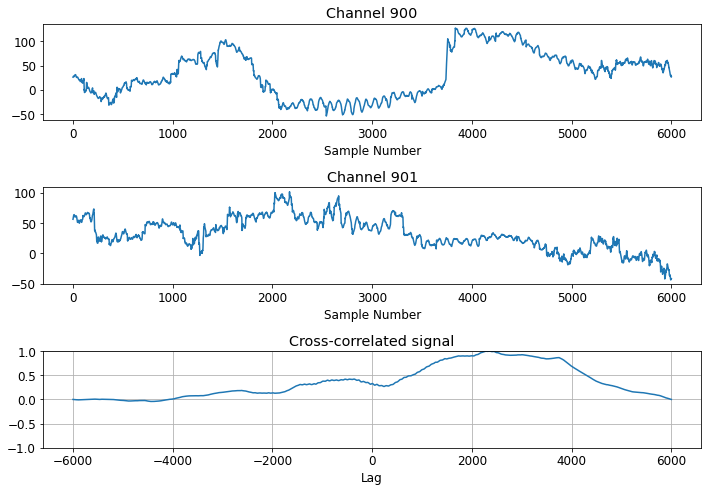

In [127]:
fig, (ax_1, ax_2, ax_corr) = plt.subplots(3, 1, figsize=(10, 7))
ax_1.plot(data1)
ax_1.set_title('Channel {}'.format(channels[0]))
ax_1.set_xlabel('Sample Number')
ax_2.plot(data2)
ax_2.set_title('Channel {}'.format(channels[1]))
ax_2.set_xlabel('Sample Number')
ax_corr.plot(np.arange(-len(corr)/2,len(corr)/2), corr)
ax_corr.set_ylim(-1,1)
ax_corr.grid()
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
fig.tight_layout()
plt.show()